<a href="https://colab.research.google.com/github/Raflinfp/Tugas2-Text-Mining-Twitter/blob/main/TugasKlasteringTwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Langkah 1 
Install snscrape terlebih dahulu

In [ ]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Langkah 2
Install langdetect

In [ ]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Langkah 3
Import snscrape dari twitter

In [ ]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

Langkah 4
Masukkan keywoard yang diinginkan dan juga tanggal yang diinginkan

In [ ]:
keywords=['PBSI']
start="2022–09–01"
end ="2022–10–03"
max_num=100
fname='tweet.json' 
languages=['id','en']

Langkah ke 5
Import pandas

In [ ]:
import pandas as pd
datatw=[]

Langkah ke 6
Melakukan scrapping menggunakan snscrape pada twitter 

In [ ]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
           # print(data)
            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                #print(line)
                f.write(line)
                f.write('\n')

Langkah ke 7 
Menampilkan data yang ingin dicari

In [ ]:
datatw

['pengen bgt make wallpaper bujang2 pbsi, tapi takutnya nanti kalo diliat emak dikiranya pacar w lagi… lg menghindarkan bgt pertanyaan2 memancing kek gitu hiks',
 'humas pbsi yang sebenarnya https://t.co/ze7G0Q7bVh',
 'Herry IP Bicara Target Ganda Putra di Denmark Open dan France Open 2022 https://t.co/5nRpDzaicY baca juga berita dari media lainnya di Indonesia di https://t.co/GkwQxRUMd1 \n\n#denmarkopen #herryip #kevinsanjaya #marcusfernaldigideon #hendrasetiawan #rionnymainaky #pbsi',
 'Tim Asesor LAMDIK Visitasi Prodi PBSI FKIP Unismuh secara Luring\nhttps://t.co/JAMEggnyoV',
 '@/pbsi gua liat2 lu kaga ngepost foto rayen dari kemaren????? Butuh woi',
 'Indonesia Masters 2022 Super 100 Tutup Turnamen Bergengsi Tahun Ini\xa0 https://t.co/L9BxBqhd81 baca juga berita dari media lainnya di Indonesia di https://t.co/GkwQxScVr9 \n\n#indonesiamasters #indonesiamasters2022super100 #bwf #indonesiamasters2022 #pbsi',
 'Tim bulutangkis Indonesia akan memulai kembali perjuangannya di turnamen BW

Langkah ke 8 
Install Sastrawi 

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Langkah ke 9 
Membuat objek untuk folding,stemming,filtering 

In [ ]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatw:

    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove URL
    document_test = re.sub(r'http\S+', '', document_test)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)

Langkah 10
Menampilkan data yang sudah clean

In [ ]:
documents_clean[1:10]

['humas pbsi yang sebenarnya ',
 'herry ip bicara target ganda putra di denmark open dan france open baca juga berita dari media lainnya di indonesia di denmarkopen herryip kevinsanjaya marcusfernaldigideon hendrasetiawan rionnymainaky pbsi',
 'tim asesor lamdik visitasi prodi pbsi fkip unismuh secara luring\n',
 ' pbsi gua liat lu kaga ngepost foto rayen dari kemaren butuh woi',
 'indonesia masters super tutup turnamen bergengsi tahun ini baca juga berita dari media lainnya di indonesia di indonesiamasters indonesiamasterssuper bwf indonesiamasters pbsi',
 'tim bulutangkis indonesia akan memulai kembali perjuangannya di turnamen bwf denmark open ada wakil yang diturunkan pbsi di ajang level super itu ',
 ' benar tidak punya rasa tanggung jawab empati dan korup uang doang dipikirin nyawa manusia itu kau anggap apa masa iya yg bertanggung jawab pbsi or pbvsi yo gak nyambung ',
 'tim bulutangkis indonesia akan memulai kembali perjuangannya di turnamen bwf denmark open ada wakil yang ditu

Langkah 11


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

Langkah 12

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Langkah 13

In [ ]:
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

Langkah 14
Menampilkan 20 kata yang sering muncul 

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

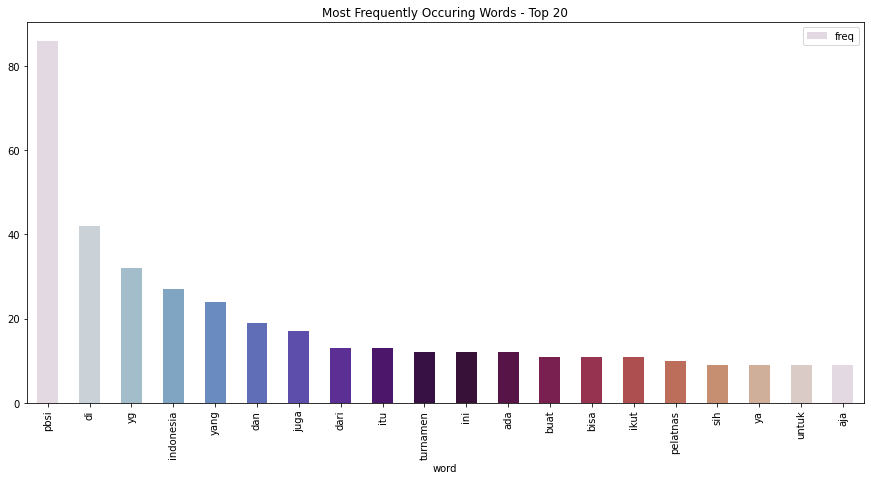

In [ ]:
color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

Langkah 15
Klastering

In [ ]:
from sklearn.cluster import KMeans

Langkah 16

In [ ]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

Langkah 17
Menampilkan 10 data dari setiap cluster 

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names_out()

for i in range(true_k):
  print("Cluster %d:" % i),
  
  for ind in order_centroids[i, :10]:
      print(' %s' % terms[ind]),
  
  print()

Cluster 0:
 pbsi
 yg
 di
 dan
 yang
 ikut
 ini
 aja
 ada
 ya

Cluster 1:
 indonesia
 malang
 sport
 mansion
 at
 challenge
 the
 pbsi
 international
 pramudya

Cluster 2:
 di
 indonesia
 pbsi
 yang
 juga
 open
 dari
 itu
 dan
 turnamen



Langkah 18
Memprediksi

In [ ]:
print("Prediction")
Y = cv.transform(["Thomas Cup"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["Lin Dan"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Prediction
Cluster number : [0]
Cluster number : [0]


Langkah 19
Klastering

In [ ]:
import scipy.cluster.hierarchy as sch

Langkah 20
Menggabungkan cluster dan Menampilkan Dendogram

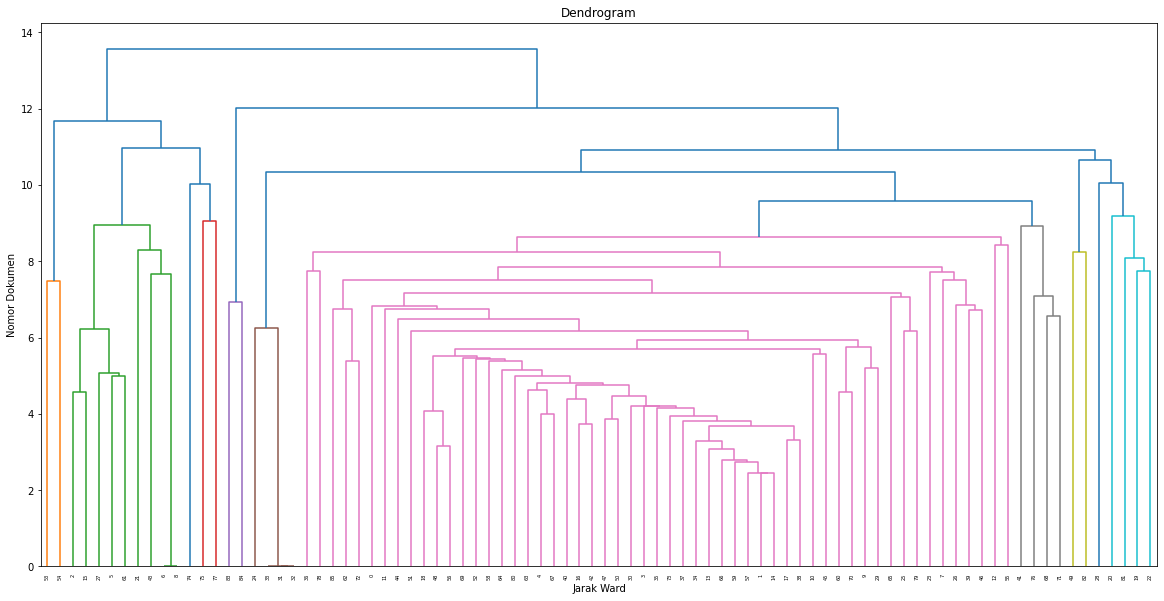

In [ ]:
X = cv.fit_transform(documents_clean).todense()
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

Langkah 21
Memprediksi cluster

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 
print(cluster.labels_)

[2 2 4 2 2 4 4 2 4 2 2 2 2 2 2 4 2 2 2 0 0 4 0 2 2 2 2 4 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 4 2 2 2 2 2 0 2 2 2 3 3 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 2 1 2 2 2 0 0 5 5 2]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Langkah 22
Menggabungkan Cluster dan menampilkan Dendogram

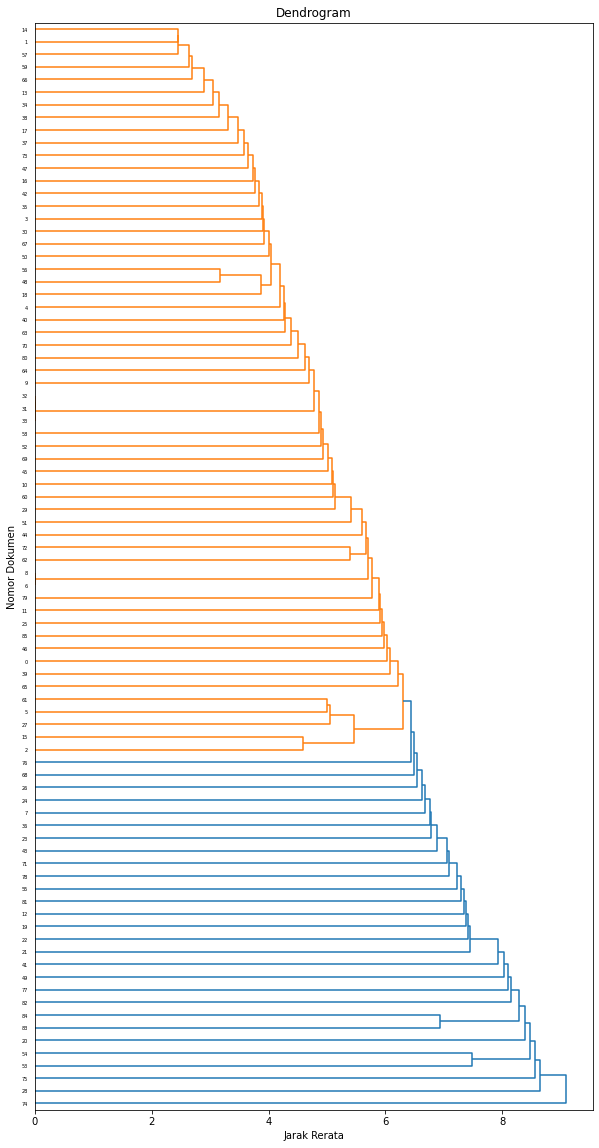

In [ ]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
plt.figure(figsize=(10, 20))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

Langkah 23
Menggabungkan Cluster dan menampilkan Dendogram

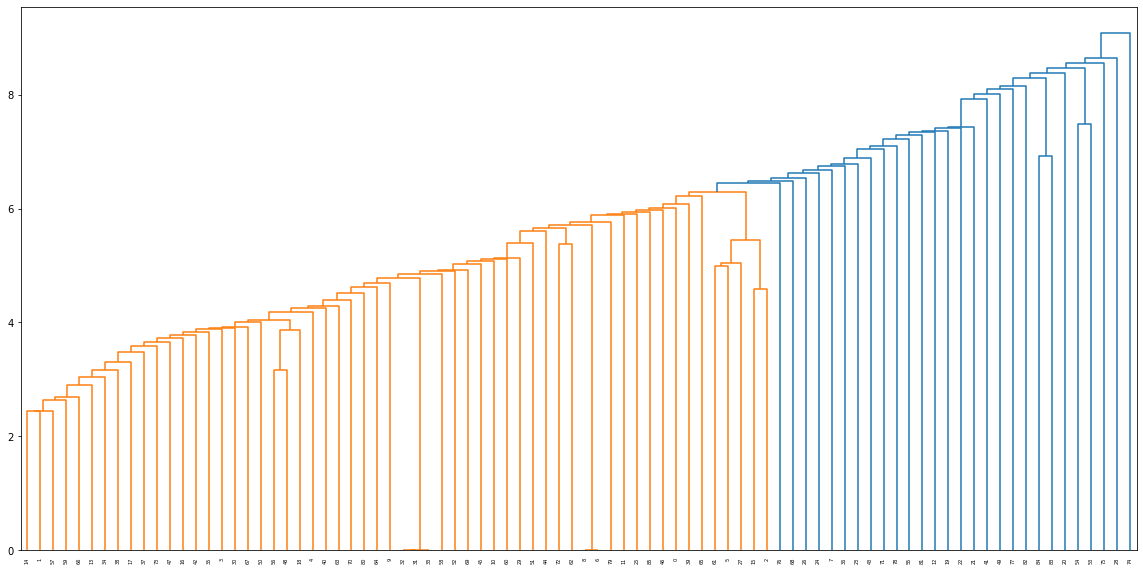

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'average')

labelList = range(0, len(cluster.labels_))

plt.figure(figsize=(20, 10))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

Langkah 24 
Proses HC dan memprediksi Cluster

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')  
cluster.fit_predict(X) 
print(cluster.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 4 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Langkah 25

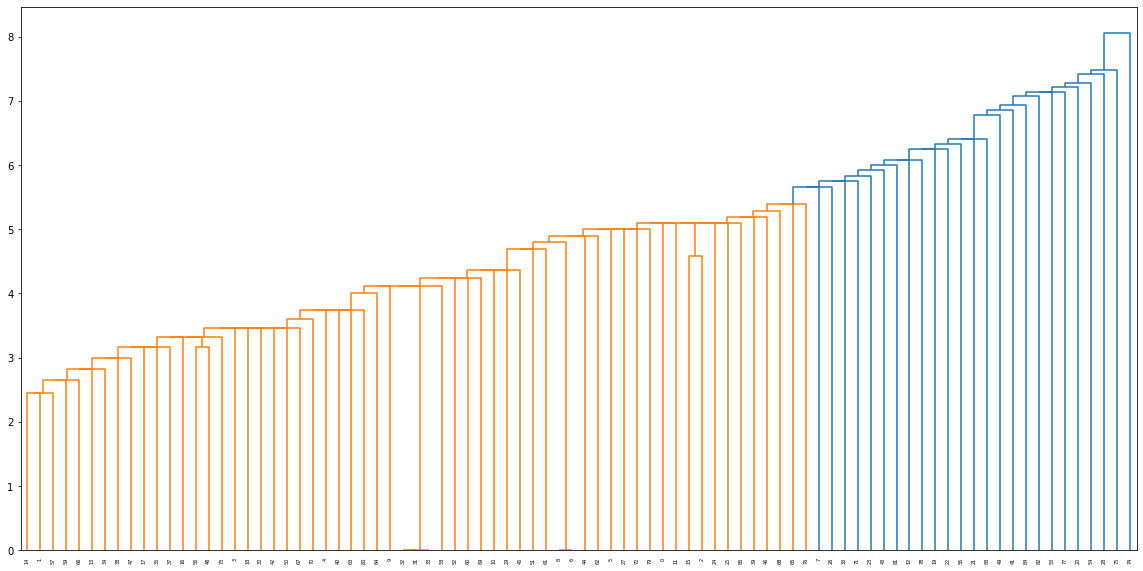

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(0, len(cluster.labels_))

plt.figure(figsize=(20, 10))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

Langkah 26 
Memprediksi Clusternya

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')  
cluster.fit_predict(X) 
print(cluster.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 2 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
